# Sessio 1: Introducció a la Computació Quàntica

### (Comencem afegint el paquet de càlculs numèrics Numpy)

In [2]:
import numpy as np

### Els estats quàntics es defineixen en un espai de Hilbert. Aquest espai pot tenir un nombre finit o infinit de dimensions. Pel cas d'un Qubit aquest és un espai de 2 dimensions, que definim com un vector de 2 components.

In [21]:
state = np.array([1,0])
state

array([1, 0])

### Els estats quàntics són modificats per operadors. El resultat de l'acció d'un operador sobre un estat quàntic és un altre estat quàntic. Els operadors que modifiquen el Qubit s'escriuen com a matrius 2x2.

In [4]:
sx = np.array([[0,1],[1,0]])
sx

array([[0, 1],
       [1, 0]])

In [6]:
sz = np.array([[1,0],[0,-1]])
sz

array([[ 1,  0],
       [ 0, -1]])

In [7]:
identity = np.eye(2)
identity

array([[1., 0.],
       [0., 1.]])

In [11]:
h = np.array([[1,1],[1,-1]])/np.sqrt(2)
h

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

In [9]:
cnot = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
cnot

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

In [10]:
cz = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,-1]])
cz

array([[ 1,  0,  0,  0],
       [ 0,  1,  0,  0],
       [ 0,  0,  1,  0],
       [ 0,  0,  0, -1]])

### Modifiquem l'estat aplicant l'operador sobre l'estat multiplicant la matriu de l'operador pel vector estat.

In [15]:
state = np.dot(h, state)
state

array([ 0.70710678, -0.70710678])

### Recordem que els estats quàntics han d'estar normalitzats

In [16]:
def norm(state):
    return np.linalg.norm(state)

In [17]:
norm(state)

0.9999999999999999

In [18]:
norm(np.array([2,0]))

2.0

### Les probabilitats d'obtenir una mesura s'obtenen a partir de la funció d'ona

In [19]:
def probabilities(state):
    return np.square(np.abs(state))/np.square(norm(state))

In [22]:
probabilities(state)

array([1., 0.])

In [11]:
probabilities(np.array([1,1]))

array([0.5, 0.5])

### Construïm estats de 2 qubits ... 

In [12]:
state = np.array([1, 0, 0, 0])
state

array([1, 0, 0, 0])

### ... i operadors de 2 qubits

In [23]:
sx_0_identity_1 = np.kron(identity, sx)
sx_0_identity_1

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [14]:
state = np.dot(sx_0_identity_1, state)
state

array([0., 0., 1., 0.])

### Mesurem els recursos que necessitem quan fem una simulació de més d'un qubit

In [24]:
from sys import getsizeof
def multiqubit(N):
    ini = sx
    for i in range(N):
        ini = np.kron(ini,sx)
    return getsizeof(ini)

In [25]:
import time

In [26]:
running_times = []
memory_size = []
for i in range(2,12):
    start = time.time()
    mem_i = multiqubit(i)
    end = time.time()
    running_times.append(end-start)
    memory_size.append(mem_i)

In [27]:
running_times

[0.0005371570587158203,
 0.0003788471221923828,
 0.00046062469482421875,
 0.0007412433624267578,
 0.0016989707946777344,
 0.0028619766235351562,
 0.009296655654907227,
 0.04181051254272461,
 0.14217901229858398,
 0.597221851348877]

In [28]:
memory_size

[624, 2160, 8304, 32880, 131184, 524400, 2097264, 8388720, 33554544, 134217840]

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline 

### Representem els recursos (temps i memòria) emprats per crear un operador de N qubits

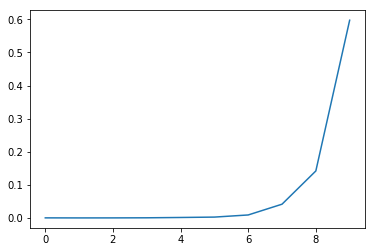

In [30]:
plt.plot(running_times)

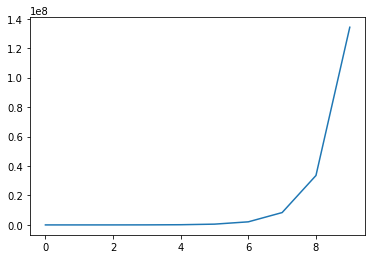

In [22]:
plt.plot(memory_size)

## Exercici 1

In [31]:
state_0 = np.array([1,0,0,0])
state_0

array([1, 0, 0, 0])

In [32]:
state_1 = np.dot(np.kron(sx,identity),state_0)
state_1

array([0., 0., 1., 0.])

In [33]:
state_2 = np.dot(cnot, state_1)
state_2

array([0., 0., 0., 1.])

In [34]:
state_3 = np.dot(np.kron(identity,h), state_2)
state_3

array([ 0.        ,  0.        ,  0.70710678, -0.70710678])

In [35]:
probabilities(state_3)

array([0. , 0. , 0.5, 0.5])

# Exercici 2

In [37]:
state_0 = np.array([1,0,0,0])

In [38]:
state_1 = np.dot(np.kron(h,identity),state_0)

In [40]:
state_2 = np.dot(cnot,state_1)
state_2

array([0.70710678, 0.        , 0.        , 0.70710678])

In [41]:
probabilities(state_2)

array([0.5, 0. , 0. , 0.5])